# MNIST Convolutional Neural Network

<img src="https://miro.medium.com/max/2200/1*XdCMCaHPt-pqtEibUfAnNw.png" alt="" height="20" width="500" />

In [1]:
import keras as kr
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import gzip
import sklearn.preprocessing as pre

Using TensorFlow backend.


## Read Train Images and Train Labels

In [2]:
with gzip.open('./train-images-idx3-ubyte.gz', 'rb') as f:
    train_images = f.read()
    
with gzip.open('./train-labels-idx1-ubyte.gz', 'rb') as f:
    train_labels = f.read()

## Read Test Images and Test Labels

In [3]:
with gzip.open('./t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_images = f.read()
    
with gzip.open('./t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_labels = f.read()

In [4]:
type(train_images)

bytes

In [5]:
train_images[0:4]

b'\x00\x00\x08\x03'

## Little and Big Endian

In [6]:
# little and big endian
int.from_bytes(train_images[0:4], byteorder='big')

2051

In [7]:
int.from_bytes(train_images[4:8], byteorder='big')

60000

In [8]:
int.from_bytes(train_images[8:12], byteorder='big')

28

In [9]:
int.from_bytes(train_images[12:16], byteorder='big')

28

In [10]:
int.from_bytes(train_images[278:279], byteorder='big')

107

## Reading Images

In [11]:
image = train_images[16:800]

type(image)

bytes

In [12]:
# Read image as byte vector size 784, convert to 28 x 28 numpy unint8 2D array
image = ~np.array(list(train_images[16:800])).reshape(28,28).astype(np.uint8)

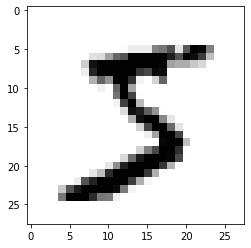

In [13]:
plt.imshow(image, cmap='gray')

## Reading Image labels

In [14]:
int.from_bytes(train_labels[8:9], byteorder='big')

5

## Save images and labels as numpy arrays

In [15]:
# read training images as bytes and convert to 2D matrix for CNN
train_images = ~np.array(list(train_images[16:])).reshape(60000, 28, 28)

# scale values between 0 and 1
train_images / 255.0

# read in training labels 0 - 9
train_labels = np.array(list(train_labels[8:])).astype(np.uint8)

# test images read as bytes and convert to 2D matrix for CNN
test_images = ~np.array(list(test_images[16:])).reshape(10000, 28, 28)

# scale values between 0 and 1
test_images / 255.0

# read in test labels 0 - 9
test_labels = np.array(list(test_labels[8:])).astype(np.uint8)

# inspect data shape
print('train images shape: ', train_images.shape)
print('train labels shape: ', train_labels.shape)

# reshape numpy arrays for grayscale colour channel 
train_inputs = train_images.reshape(60000, 28, 28, 1)
test_inputs = test_images.reshape(10000, 28, 28, 1)

# check data after
print('train inputs shape: ', train_inputs.shape)

train images shape:  (60000, 28, 28)
train labels shape:  (60000,)
train inputs shape:  (60000, 28, 28, 1)


# One Hot Encode Labels

In [16]:
# define label binarizer instance
train_encoder = pre.LabelBinarizer()

# fit the training labels
train_encoder.fit(train_labels)

# transform labels to categorical data
train_outputs = train_encoder.transform(train_labels)

print('train label 0: {}, outputs 0: {}\n'.format(train_labels[0], train_outputs[0]))

# loop and print encoder values
for i in range(10):
    print('At index {}, value is {}'.format(i, train_encoder.transform([i])))

# test label binarizer
test_encoder = pre.LabelBinarizer()

# fit test labels
test_encoder.fit(test_labels)

# transform to categorical
test_outputs = test_encoder.transform(test_labels)

print('\ntest label 0: {}, outputs 0: {}\n'.format(test_labels[0], test_outputs[0]))

# loop and print encoder values
for i in range(10):
    print('At index {}, value is {}'.format(i, test_encoder.transform([i])))

train label 0: 5, outputs 0: [0 0 0 0 0 1 0 0 0 0]

At index 0, value is [[1 0 0 0 0 0 0 0 0 0]]
At index 1, value is [[0 1 0 0 0 0 0 0 0 0]]
At index 2, value is [[0 0 1 0 0 0 0 0 0 0]]
At index 3, value is [[0 0 0 1 0 0 0 0 0 0]]
At index 4, value is [[0 0 0 0 1 0 0 0 0 0]]
At index 5, value is [[0 0 0 0 0 1 0 0 0 0]]
At index 6, value is [[0 0 0 0 0 0 1 0 0 0]]
At index 7, value is [[0 0 0 0 0 0 0 1 0 0]]
At index 8, value is [[0 0 0 0 0 0 0 0 1 0]]
At index 9, value is [[0 0 0 0 0 0 0 0 0 1]]

test label 0: 7, outputs 0: [0 0 0 0 0 0 0 1 0 0]

At index 0, value is [[1 0 0 0 0 0 0 0 0 0]]
At index 1, value is [[0 1 0 0 0 0 0 0 0 0]]
At index 2, value is [[0 0 1 0 0 0 0 0 0 0]]
At index 3, value is [[0 0 0 1 0 0 0 0 0 0]]
At index 4, value is [[0 0 0 0 1 0 0 0 0 0]]
At index 5, value is [[0 0 0 0 0 1 0 0 0 0]]
At index 6, value is [[0 0 0 0 0 0 1 0 0 0]]
At index 7, value is [[0 0 0 0 0 0 0 1 0 0]]
At index 8, value is [[0 0 0 0 0 0 0 0 1 0]]
At index 9, value is [[0 0 0 0 0 0 0 0 0 

# Convolutional Neural Network

In [17]:
# add sequential model
model = Sequential()

# add a 2D convolution layer, creates a convolution kernel which helps produce a tensor of outputs
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))

# https://datascience.stackexchange.com/questions/53426/what-exactly-is-batchnormalization-in-keras
# https://keras.io/layers/normalization/
# normalizes input to the activation function
model.add(BatchNormalization())

# add another 2D layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

# normalize between layers
model.add(BatchNormalization())

# https://keras.io/layers/pooling/
# Max pooling operation for spatial data
# chooses the best features
model.add(MaxPool2D(pool_size=(2,2)))

# normalize between layers
model.add(BatchNormalization())

# 2D --> 1D
model.add(Flatten())

# add Dense layer to get all relevant data
model.add(Dense(128, activation='relu'))

# normalize between layers
model.add(BatchNormalization())

# add dense layer with softmax activation function for probability of 0-9 value
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


# Summary of Model

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
__________

# Train the Model

In [19]:
model.fit(train_inputs, train_outputs, batch_size=128, epochs=2, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/2
60000/60000 [==============================] - 632s 11ms/step - loss: 0.1004 - acc: 0.9698
Epoch 2/2
60000/60000 [==============================] - 628s 10ms/step - loss: 0.0291 - acc: 0.9916


# Evaluate Model

In [22]:
val_loss, val_acc = model.evaluate(test_inputs, test_outputs)

print(val_loss, val_acc)

10000/10000 [==============================] - 53s 5ms/step
0.038683432718506085 0.9861


# Save the Model

In [23]:
model.save('mnist_conv2d.h5')

# Load the Model

In [24]:
new_model = kr.models.load_model('mnist_conv2d.h5')

# Make a prediction

In [26]:
predictions = new_model.predict([test_inputs])

print('At predictions index 50, number is a ', np.argmax(predictions[50]))

At predictions index 50, number is a  6


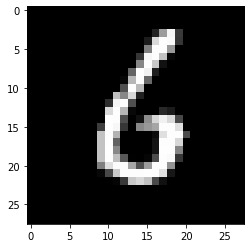

In [27]:
plt.imshow(test_inputs[50].reshape(28, 28), cmap=plt.cm.binary)

# Research References

* https://keras.io/examples/mnist_cnn/
* https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/mnist.ipynb
* https://www.kaggle.com/kentaroyoshioka47/cnn-with-batchnormalization-in-keras-94
* https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
* https://missinglink.ai/guides/keras/keras-conv2d-working-cnn-2d-convolutions-keras/

# End